In [1]:
import pandas as pd
import sweetviz
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
import tqdm
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/situ/Downloads/heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
y = np.array(df['target'])
X = df.drop('target', 1)
print(X)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [5]:
my_report = sweetviz.analyze(df, target_feat='target')

:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [6]:
my_report.show_html("Report.html")

In [7]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_cross, y_train, y_cross = train_test_split(X_1, y_1, test_size=0.3,random_state=1)

In [23]:
def findKandAUC(algo,metric, x_train, y_train, x_cross, y_cross):
    roc_train=[]
    roc_cross=[]
    K_list=list(range(1,140,1))
    k_vlaues=[]
    max_auc=0
    k_best=0

    for i in K_list:
        knn=KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm=algo,leaf_size=30, p=2, metric=metric)
        knn.fit(x_train, y_train)

        #crossvalidation 
        pred_cross = knn.predict_proba(x_cross)
        pred_cross=(pred_cross)[:,1]
        roc_cross.append(roc_auc_score(y_cross,pred_cross))

         #traininig
        pred_train = knn.predict_proba(x_train)
        pred_train=(pred_train)[:,1]
        roc_train.append(roc_auc_score(y_train,pred_train))

        k_vlaues.append(i)

        #finding best k using max value of auc score
        if roc_auc_score(y_cross,pred_cross)>max_auc:
            k_best=i
            max_auc=roc_auc_score(y_cross,pred_cross)

    print(k_best)        
    print(max_auc)
    
    
    plt.plot(k_vlaues,roc_cross ,label="Cross validation")
    plt.plot(k_vlaues,roc_train,label="Train")
    plt.legend()
    plt.title('AUC Score vs K')
    plt.xlabel('K values')
    plt.ylabel('AUC')
    plt.show()
    
    return k_best,max_auc, plt

112
0.7473118279569892


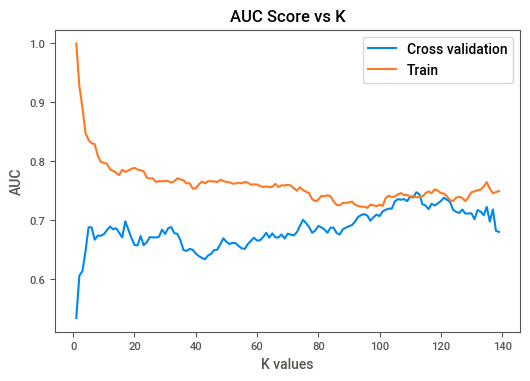

In [24]:
k_brute,auc_brute,plt=findKandAUC("brute","cosine", X_train, y_train, X_cross, y_cross)

In [25]:
print("Best K value :"+ str(k_brute) )

Best K value :112


In [26]:
print("Accuracy of Best K value :"+ str(auc_brute) )

Accuracy of Best K value :0.7473118279569892
